## Aprendizado não supervisonada: Agrupamento

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para agrupar clientes de shopping.

Os dados foram extraídos do site do Kaggle:
https://www.kaggle.com/shwetabh123/mall-customers

### Importando as Bibliotecas e carregando os dados

In [208]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Esse codigo deixa os graficos em modo Dark
plt.style.use('dark_background')

# Ignorando avisos desnecessários
warnings.filterwarnings('ignore')

# Carregando os dados
df = pd.read_csv('/Users/diogomonteiro/Mall_Customers.csv')

# Visualizando os dados
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


------

### Análise da Exploratória dos dados

**Objetivo:**

1 -  analisar as variáveis 1 a 1 e conhecer os dados.

2 - Encontrar dados nulos, outliers e etc...

**Função para analisar as colunas** 

_______________________________________________________________________________________
Nome da coluna: CustomerID
---------------------------------------------------------------------------------------
Tipo da coluna: int64 | Quantidade de dados da coluna: (200,)
---------------------------------------------------------------------------------------
dados nulos da coluna: 0
---------------------------------------------------------------------------------------
dados nulos da coluna: 
count    200.000000
mean     100.500000
std       57.879185
min        1.000000
25%       50.750000
50%      100.500000
75%      150.250000
max      200.000000
Name: CustomerID, dtype: float64
---------------------------------------------------------------------------------------


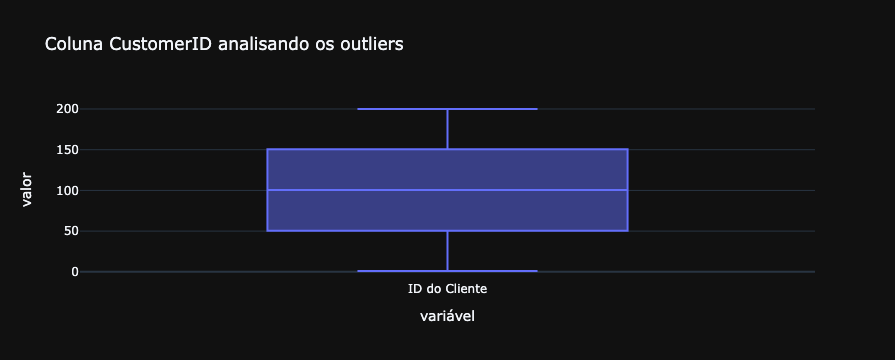

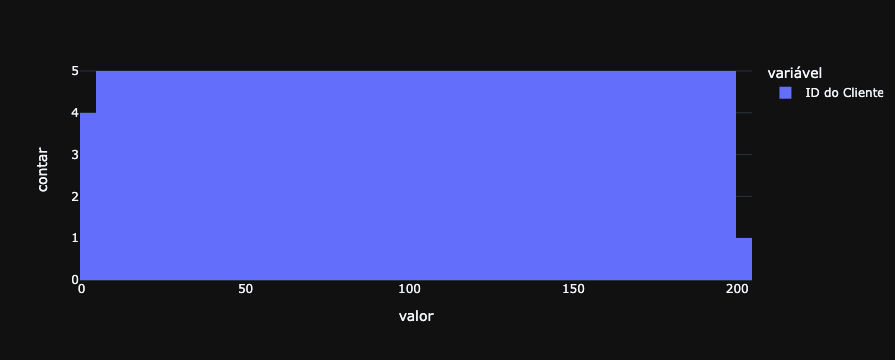

---------------------------------------------------------------------------------------
_______________________________________________________________________________________
Nome da coluna: Genre
---------------------------------------------------------------------------------------
Tipo da coluna: object | Quantidade de dados da coluna: (200,)
---------------------------------------------------------------------------------------
dados nulos da coluna: 0
---------------------------------------------------------------------------------------
Contagem das variáveis: 
Genre
Female    112
Male       88
Name: count, dtype: int64
---------------------------------------------------------------------------------------


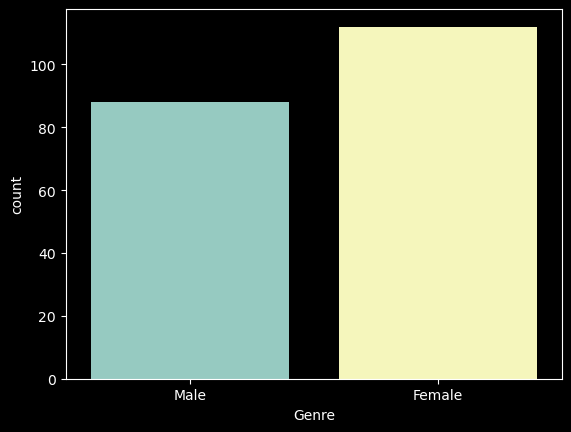

---------------------------------------------------------------------------------------
_______________________________________________________________________________________
Nome da coluna: Age
---------------------------------------------------------------------------------------
Tipo da coluna: int64 | Quantidade de dados da coluna: (200,)
---------------------------------------------------------------------------------------
dados nulos da coluna: 0
---------------------------------------------------------------------------------------
dados nulos da coluna: 
count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64
---------------------------------------------------------------------------------------


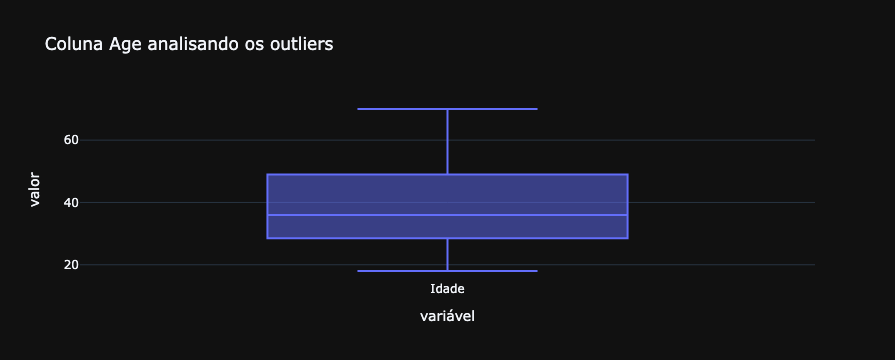

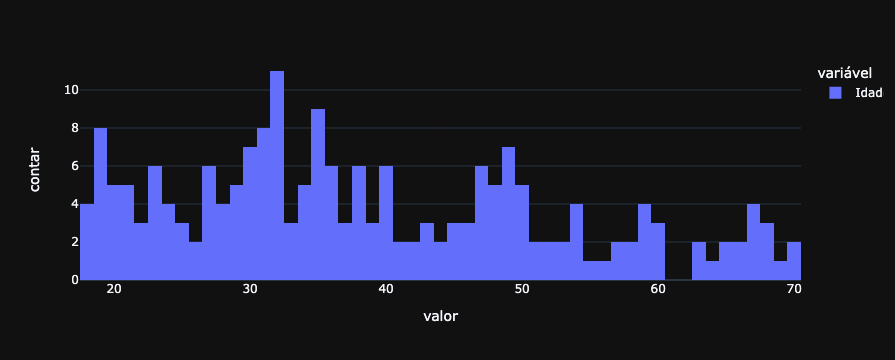

---------------------------------------------------------------------------------------
_______________________________________________________________________________________
Nome da coluna: Annual Income (k$)
---------------------------------------------------------------------------------------
Tipo da coluna: int64 | Quantidade de dados da coluna: (200,)
---------------------------------------------------------------------------------------
dados nulos da coluna: 0
---------------------------------------------------------------------------------------
dados nulos da coluna: 
count    200.000000
mean      60.560000
std       26.264721
min       15.000000
25%       41.500000
50%       61.500000
75%       78.000000
max      137.000000
Name: Annual Income (k$), dtype: float64
---------------------------------------------------------------------------------------


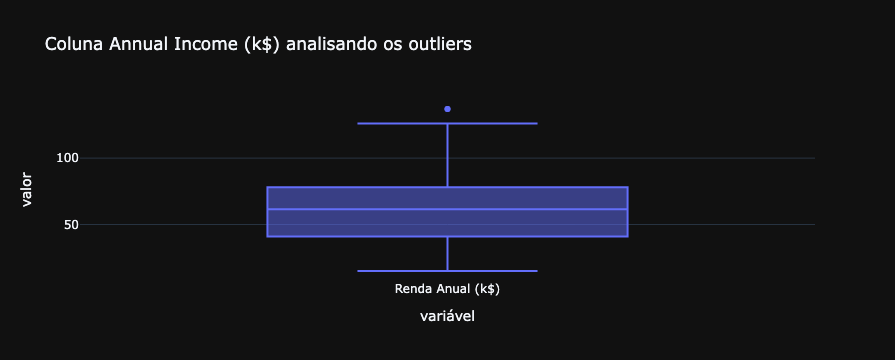

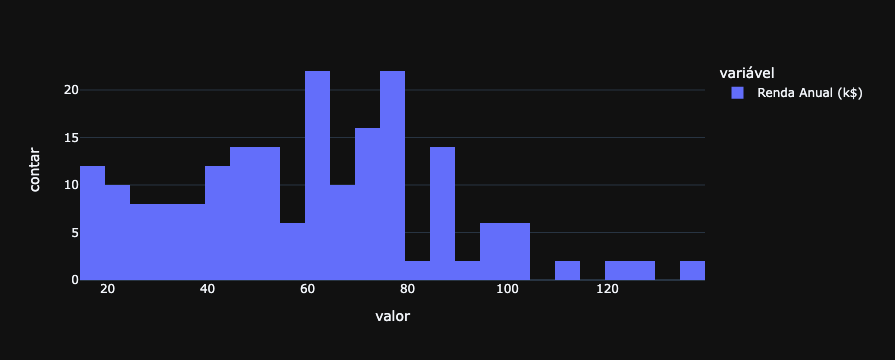

---------------------------------------------------------------------------------------
_______________________________________________________________________________________
Nome da coluna: Spending Score (1-100)
---------------------------------------------------------------------------------------
Tipo da coluna: int64 | Quantidade de dados da coluna: (200,)
---------------------------------------------------------------------------------------
dados nulos da coluna: 0
---------------------------------------------------------------------------------------
dados nulos da coluna: 
count    200.000000
mean      50.200000
std       25.823522
min        1.000000
25%       34.750000
50%       50.000000
75%       73.000000
max       99.000000
Name: Spending Score (1-100), dtype: float64
---------------------------------------------------------------------------------------


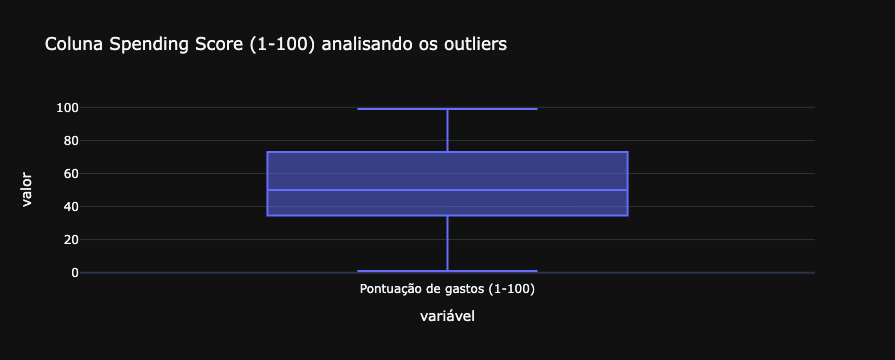

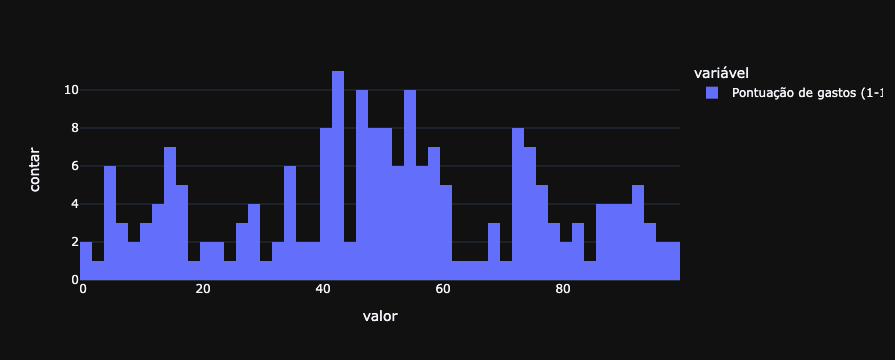

---------------------------------------------------------------------------------------


In [133]:
def analise(dados):
    for i in dados.columns:
        if dados[i].dtypes == "int64" or dados[i].dtypes == "float64":
            print('_______________________________________________________________________________________')
            print(f'Nome da coluna: {dados[i].name}')
            print('---------------------------------------------------------------------------------------')
            print(f'Tipo da coluna: {dados[i].dtypes} | Quantidade de dados da coluna: {dados[i].shape}')
            print('---------------------------------------------------------------------------------------')
            print(f'dados nulos da coluna: {dados[i].isna().sum()}')
            print('---------------------------------------------------------------------------------------')
            print(f'dados nulos da coluna: \n{dados[i].describe()}')
            print('---------------------------------------------------------------------------------------')
            fig = px.box(dados[i],title=f'Coluna {dados[i].name} analisando os outliers', template="plotly_dark")
            fig.show()
            fig1 = px.histogram(dados[i],nbins=60 ,template='plotly_dark')
            fig1.show()
            print('---------------------------------------------------------------------------------------')

        else:
            print('_______________________________________________________________________________________')
            print(f'Nome da coluna: {dados[i].name}')
            print('---------------------------------------------------------------------------------------')
            print(f'Tipo da coluna: {dados[i].dtypes} | Quantidade de dados da coluna: {dados[i].shape}')
            print('---------------------------------------------------------------------------------------')
            print(f'dados nulos da coluna: {dados[i].isna().sum()}')
            print('---------------------------------------------------------------------------------------')
            print(f'Contagem das variáveis: \n{dados[i].value_counts()}')
            print('---------------------------------------------------------------------------------------')
            sns.countplot(dados,x=dados[i])
            plt.show()
            print('---------------------------------------------------------------------------------------')
            

analise(df)

### **Resposta:**

Ao analisar as colunas, vi que não tem dados nulos e não vamos precisar fazer tratamentos.

------------

### **Pré-processamento** 

**Objetivo é:**

1 - Excluir a coluna Id, pois não vamos precisar dela.

2 - Transformar a coluna Genre, que é categórica para numérica.


In [198]:
# Copiando o dataframe para df1
df1 = df

**Excluindo a coluna Id**

In [172]:
df1 = df1.drop(['CustomerID'], axis=1)
df1

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


**Transformando as variáveis categóricas em numéricas**

In [182]:
df1.Genre.replace({'Male': 1,'Female': 0},inplace=True)

In [184]:
df1

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


**Escalonamento**

In [193]:
scaler = StandardScaler()
df1_esc = scaler.fit_transform(df1)
df1_esc

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

### **Resposta:**

Exclui a coluna Id que não ia ser ultilizada, transformei a coluna Genre em numéricas e escalonamos.

-------

### **K-MEANS com dois atributos**

In [206]:
dados = df1.iloc[:, [2,3]].values
dados

array([[ 19,  15],
       [ 21,  15],
       [ 20,  16],
       [ 23,  16],
       [ 31,  17],
       [ 22,  17],
       [ 35,  18],
       [ 23,  18],
       [ 64,  19],
       [ 30,  19],
       [ 67,  19],
       [ 35,  19],
       [ 58,  20],
       [ 24,  20],
       [ 37,  20],
       [ 22,  20],
       [ 35,  21],
       [ 20,  21],
       [ 52,  23],
       [ 35,  23],
       [ 35,  24],
       [ 25,  24],
       [ 46,  25],
       [ 31,  25],
       [ 54,  28],
       [ 29,  28],
       [ 45,  28],
       [ 35,  28],
       [ 40,  29],
       [ 23,  29],
       [ 60,  30],
       [ 21,  30],
       [ 53,  33],
       [ 18,  33],
       [ 49,  33],
       [ 21,  33],
       [ 42,  34],
       [ 30,  34],
       [ 36,  37],
       [ 20,  37],
       [ 65,  38],
       [ 24,  38],
       [ 48,  39],
       [ 31,  39],
       [ 49,  39],
       [ 24,  39],
       [ 50,  40],
       [ 27,  40],
       [ 29,  40],
       [ 31,  40],
       [ 49,  42],
       [ 33,  42],
       [ 31,